# Context

## Background

Cultivating brand loyalty is key for the BBC to remain relevant in a data-driven world dominated by the likes of Youtube, Netflix and Facebook. We know that tens of thousands of viewers consume our content on iPlayer everyday but we still have very little understanding of what makes them come back for more. In order to keep our audience engaged, it is vital that we develop audience statistics that reflect how likely they are to continue consuming our content. These metrics will then enable us to gain greater insights into whether we are surfacing the right content to the right audience members. These activities will be vital for retaining and growing our audiences both domestically and around the world. 

## Problem Formulation
One way of measuring the engagement of a user is to count how much content they have consumed over a given period.  Engagement, measured in this way, may be affected by many different factors ranging from the kind of content they enjoy to the time of day they consume it.
 
In our current exercise, what we want to understand is how an audience member consumes content, based upon their past behaviour. More specifically, what we will do in this case is to investigate if there is a relationship between an audience member’s viewing behaviour (what and when they have watched on iPlayer) over a 16-week period and the amount of content they consumed in the subsequent two-week period.

## Goal of this course
During this first course we will have a first look at the data. XXX DETAILS


# Data exploration

## Data Sampling

The data you use to solve your problem is called your dataset. To ensure that any inferences you make from your dataset can be generalised to “the real world” it is important to ensure that the data you choose for your dataset is indeed a good representation of the wider population it is sampled from and, in particular, free from systematic biases. Regardless of what machine-learning techniques you eventually use, if your dataset is not a good approximation of the population it is supposed to represent, you will struggle to find a satisfactory solution to your problem.
 
For our particular problem, we have a dataset containing __the viewing history of 10,000 iPlayer viewers__. To ensure that this is a representative sample those viewers were sampled from all over the UK and are accurate representations over all age groups, socio-economic class, race and gender. 
 
For more information on data sampling please see the Wikipedia page here:
https://en.wikipedia.org/wiki/Sampling_(statistics)  

## Import the data and have a first overview

The first thing to do is to load the data and get a first idea what it looks like.

In [1]:
# Import all relevent libraries to analyse the data
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt

# This line makes sure that our graphs are rendered within the notebook
%matplotlib inline

#Set options to display all columns
pd.set_option("display.max_columns",None)

*Pandas* is a really easy-to-use library to deal with datasets and perform data analysis. Among others it has a great datetime parsing function which will make manipulating datetimes later much easier!

Make sure to have your dataset in the same folder than your notebook. Or specify its path `'path/to/data/iplayer_data_sample_janapr2017.csv'`.

In [2]:
# Load the data into a pandas dataframe
# Display the size of the dataset and first couple of rows to see what it looks like
data=pd.read_csv('iplayer_data_sample_janapr2017.csv', parse_dates=['start_date_time'])
print(data.shape)
print(data.head())

(490852, 8)
  user_id program_id series_id          genre programme_duration  \
0  cd2006     f6d3d8    a282ca        Factual           00:00:21   
1  cd2006     b8fbf2    e0480e         Comedy           00:01:51   
2  cd2006     e2f113    933a1b        Factual           00:00:30   
3  cd2006     0e0916    b68e79  Entertainment           00:01:22   
4  cd2006     ca03b9    5d0813          Sport           00:01:37   

      streaming_id         start_date_time  time_viewed  
0  1486911129420_1 2017-02-12 14:51:24.544      20920.0  
1  1484864257965_1 2017-01-19 22:17:04.648     111285.0  
2  1487099603980_1 2017-02-14 19:12:36.667      29945.0  
3  1484773546557_1 2017-01-18 21:05:11.466      82620.0  
4  1486911176609_1 2017-02-12 14:52:08.965      97444.0  


This output gives us a broad sense of what our data look likes. We can start creating additional derived columns that we think could explain why and how much people will watch on iPlayer. This step is called __feature engineering__. 

Feature engineering is the process of identifying the input variables (_time of the day, content genre_ etc.) that will be used by your model to predict the output variable (_number of minutes watched_). The performance of your model is directly dependent upon the features you choose as input. Statistical models are essentially just pattern detectors. Different types of models have strengths and weaknesses in specific situations but they can only find structure in your data if the information exists in your features in the first place.

In most situations the process of feature engineering is an iterative one. Finding the best subset of explanatory variables is not straightforward and we will come back later on this. In the meantime we can enhance the data with additional features that we think can explain the watching time of iPlayer users. 

Our hypothesis is that the more you interact with iPlayer the more likely you are to return. So the addiotional data columns are aimed at understanding __the breadth of the user's interactions with us__.

In [3]:
# Enhance the data with a few additional columns
# Here we create some functions that we will apply to our dataset columns afterwards

# Get the weekday
def get_weekday(formated_time):
    return 'weekday_' + str(formated_time.weekday())

# Get the two-week number. We will forecast the minutes watched in the last two weeks
# Python3 rounds 0.5 up and down depending on the integer so we can't use round function
def get_twoweeknumber(formated_time):
    return math.floor(formated_time.isocalendar()[1]/2.0)

# Get the time of day
def get_timeofday(formated_time):
    hour=formated_time.hour
    if hour in range(5,13):
        return 'Morning'
    elif hour in range(13,18):
        return 'Afternoon'
    elif hour in range(18,23):
        return 'Evening'
    else:
        return 'Night'

# Parse the programme duration 
# and turn it into minutes so that we can compute the percentage of time watched
def parse_programme_duration(unformated_time):
    try:
        timeparts=unformated_time.split(':')
        return int(timeparts[0])*60.0+int(timeparts[1])+int(timeparts[2])/60.0
    except:
        return

In [4]:
# Apply the functions to the dataframe
data['weekday']=data['start_date_time'].apply(get_weekday)
data['time_of_day']=data['start_date_time'].apply(get_timeofday)
data['programme_duration_mins']=data['programme_duration'].apply(parse_programme_duration)
data['twoweek']=data['start_date_time'].apply(get_twoweeknumber)

# Convert time viewed and length of programme into minutes
data['min_watched']=data['time_viewed']/(60000.0)

data.head()

,user_id,program_id,series_id,genre,programme_duration,streaming_id,start_date_time,time_viewed,weekday,time_of_day,programme_duration_mins,twoweek,min_watched
0,cd2006,f6d3d8,a282ca,Factual,00:00:21,1486911129420_1,2017-02-12 14:51:24.544,20920.0,weekday_6,Afternoon,0.350000,3,0.348667
1,cd2006,b8fbf2,e0480e,Comedy,00:01:51,1484864257965_1,2017-01-19 22:17:04.648,111285.0,weekday_3,Evening,1.850000,1,1.854750
2,cd2006,e2f113,933a1b,Factual,00:00:30,1487099603980_1,2017-02-14 19:12:36.667,29945.0,weekday_1,Evening,0.500000,3,0.499083
3,cd2006,0e0916,b68e79,Entertainment,00:01:22,1484773546557_1,2017-01-18 21:05:11.466,82620.0,weekday_2,Evening,1.366667,1,1.377000
4,cd2006,ca03b9,5d0813,Sport,00:01:37,1486911176609_1,2017-02-12 14:52:08.965,97444.0,weekday_6,Afternoon,1.616667,3,1.624067


## Exploratory data analysis

Once we have our dataset, enhanced with some additional features we can start its exploration. First of all, we need to check the quality of the data we are working with. Most data sources are very "noisy": often data is missing for some observations or data can also be wrong. It is therefore crucial to spend some time cleaning the data to avoid a "garbage in, garbage out" problem. Cleaning involves both to __infer missing values__ and to identify __outliers__ (statistically improbable values). When dealing with missing or unusual values, keep always in mind the “business" and context of your analysis. 

Generally the investigation and enrichment of data is quite a cyclical process. As you investigate the data you have new ideas on how to fix and enrich it and you will then again check whether you have any missing or clearly wrong values in your dataset. 

Exploratory data analysis allows us as well to get a “feel” for our dataset and provides useful insights regarding the best techniques or models to use later on in the modelling stage. Data exploration can involve many different techniques and approaches but will invariably include generating __descriptive statistics__ and __visualising distributions__. Summarising our data in this way is not only useful for checking the assumptions that many models hold about our data but can also be useful to perform “sanity checks” when evaluating the output of the more complex models we use later on.

### Data quality check - missing values and outliers

In [5]:
# Check how many missing and unique values there are per column
features=data.columns.values
for feature in features:
    print(feature,'- Missing:', 
          sum(data[feature].isnull()),
          '- Unique:', len(data[feature].unique()))

user_id - Missing: 0 - Unique: 9937
program_id - Missing: 33698 - Unique: 23857
series_id - Missing: 33698 - Unique: 5921
genre - Missing: 67719 - Unique: 12
programme_duration - Missing: 33698 - Unique: 891
streaming_id - Missing: 0 - Unique: 434430
start_date_time - Missing: 0 - Unique: 490626
time_viewed - Missing: 1900 - Unique: 259532
weekday - Missing: 0 - Unique: 7
time_of_day - Missing: 0 - Unique: 4
programme_duration_mins - Missing: 33698 - Unique: 891
twoweek - Missing: 0 - Unique: 10
min_watched - Missing: 1900 - Unique: 259532


Sometimes we can improve our model by not dropping rows with missing data, but instead trying to impute what the missing values should be. Scikit has a whole set of functions for this (such as imputing the median or a fixed number), but we will create our own functions in this case because it makes it more clear what we are doing. 

Since `genre` has only a small number of possible values but quite a large number of missing values, we will start by imputing the genre to reduce the amount of missing data. After that the most useful column to impute is probably `programme_duration`, again because it is quite easy to impute and will remove a fair amount of missing data. 

We could also think about imputing `series_id` as well if we wanted to get really clever at a later stage (maybe the same programme sometimes has a `series_id` and sometimes it doesn't). 

For the other missing variables imputation probably makes little sense at this stage. 

Agaian, usually we would cycle through the whole process of imputing data > building features > building/training models > evaluating models multiple times. By having a clear success metric, it makes it much easier for us to see whether any of the additional complexity delivers value.

#### genre

Let's see first whether we can guess the genre based on the id of the piece of content.

In [6]:
# First create a data frame that maps each piece of content with its genre
series_mapping=pd.pivot_table(data,values='streaming_id',
                              index=['series_id'],
                              columns=['genre'],
                              aggfunc=len).idxmax(axis=1)
series_mapping=pd.DataFrame(series_mapping).reset_index().rename(columns={0:'enriched_genre'})
series_mapping.head()

,series_id,enriched_genre
0,001b96,Factual
1,00389f,Factual
2,00400b,Children's
3,00434d,Factual
4,0079b7,Factual


In [7]:
# let's merge in the genre back into the data
data=pd.merge(data,series_mapping,how='left',on='series_id')
data[data['genre'].isnull()].head()

,user_id,program_id,series_id,genre,programme_duration,streaming_id,start_date_time,time_viewed,weekday,time_of_day,programme_duration_mins,twoweek,min_watched,enriched_genre
134,3387a6,47f8c1,c9cc1a,NaN,00:00:00,1485900618555_1,2017-01-31 22:10:20.049,3584.0,weekday_1,Evening,0.0,2,0.059733,Factual
140,3387a6,NaN,NaN,NaN,NaN,1489439401348_1,2017-03-13 21:10:02.421,3730.0,weekday_0,Evening,NaN,5,0.062167,NaN
141,3387a6,NaN,NaN,NaN,NaN,1485100892026_1,2017-01-22 16:01:34.292,3634.0,weekday_6,Afternoon,NaN,1,0.060567,NaN
142,3387a6,NaN,NaN,NaN,NaN,1489441109070_3,2017-03-13 21:38:30.203,3651.0,weekday_0,Evening,NaN,5,0.060850,NaN
143,3387a6,NaN,NaN,NaN,NaN,1493538827057_2,2017-04-30 07:53:47.559,3665.0,weekday_6,Morning,NaN,8,0.061083,NaN


In [8]:
# Check how many missing and unique values for this column
features=['genre','enriched_genre']
for feature in features:
    print(feature,'- Missing:',sum(data[feature].isnull()),
          '- Unique:', len(data[feature].unique()))

genre - Missing: 67719 - Unique: 12
enriched_genre - Missing: 43829 - Unique: 12


So while this has made things better (compare `genre` to `enriched_genre`), we are still missing the genre for a lot of different rows of data.

Let's try to infer the genre based on seasonality patterns.

In [9]:
# What genre is the most popular at which time of day
genre_by_time=pd.pivot_table(data,values='streaming_id',
                             index=['time_of_day'],
                             columns=['enriched_genre'],
                             aggfunc=len).idxmax(axis=1)
genre_by_time=pd.DataFrame(genre_by_time).reset_index().rename(columns={0:'enriched_genre'})
genre_by_time

,time_of_day,enriched_genre
0,Afternoon,Factual
1,Evening,Factual
2,Morning,Factual
3,Night,Factual


Maybe the time of the day isn't granular enough. Let's consider the hour the content is displayed.

In [10]:
# What genre is the most popular at which hour of day
# Rmk: we first need to build this new feature
data['hour']=data.start_date_time.apply(lambda x:x.hour)
genre_by_hour=pd.pivot_table(data,values='streaming_id',
                             index=['hour'],
                             columns=['enriched_genre'],
                             aggfunc=len).idxmax(axis=1)
genre_by_hour=pd.DataFrame(genre_by_hour).reset_index().rename(columns={0:'enriched_genre_hour'})
genre_by_hour

,hour,enriched_genre_hour
0,0,Factual
1,1,Factual
2,2,Factual
3,3,Factual
4,4,Factual
5,5,News
6,6,News
7,7,Factual
8,8,Factual
9,9,Factual


With this granularity we can get the news pattern in the morning and the movies at night.

In [11]:
# let's merge in the genre back into the data
data=pd.merge(data,genre_by_hour,how='left',on='hour')
data.head()

,user_id,program_id,series_id,genre,programme_duration,streaming_id,start_date_time,time_viewed,weekday,time_of_day,programme_duration_mins,twoweek,min_watched,enriched_genre,hour,enriched_genre_hour
0,cd2006,f6d3d8,a282ca,Factual,00:00:21,1486911129420_1,2017-02-12 14:51:24.544,20920.0,weekday_6,Afternoon,0.350000,3,0.348667,Factual,14,Factual
1,cd2006,b8fbf2,e0480e,Comedy,00:01:51,1484864257965_1,2017-01-19 22:17:04.648,111285.0,weekday_3,Evening,1.850000,1,1.854750,Comedy,22,Drama
2,cd2006,e2f113,933a1b,Factual,00:00:30,1487099603980_1,2017-02-14 19:12:36.667,29945.0,weekday_1,Evening,0.500000,3,0.499083,Factual,19,Factual
3,cd2006,0e0916,b68e79,Entertainment,00:01:22,1484773546557_1,2017-01-18 21:05:11.466,82620.0,weekday_2,Evening,1.366667,1,1.377000,Entertainment,21,Drama
4,cd2006,ca03b9,5d0813,Sport,00:01:37,1486911176609_1,2017-02-12 14:52:08.965,97444.0,weekday_6,Afternoon,1.616667,3,1.624067,Sport,14,Factual


In [12]:
# Function that imputes a genre based on the series id or the time of day if data is missing
def impute_genre(row):
    if isinstance(row['genre'],str):
        return row['genre']
    elif isinstance(row['enriched_genre'],str):
        return row['enriched_genre']
    else:
        return row['enriched_genre_hour']

In [13]:
# Apply the function to the dataframe
data['enriched_genre']=data.apply(impute_genre, axis=1)

In [14]:
# Check whether this has worked
data[data['genre'].isnull()].head()

,user_id,program_id,series_id,genre,programme_duration,streaming_id,start_date_time,time_viewed,weekday,time_of_day,programme_duration_mins,twoweek,min_watched,enriched_genre,hour,enriched_genre_hour
134,3387a6,47f8c1,c9cc1a,NaN,00:00:00,1485900618555_1,2017-01-31 22:10:20.049,3584.0,weekday_1,Evening,0.0,2,0.059733,Factual,22,Drama
140,3387a6,NaN,NaN,NaN,NaN,1489439401348_1,2017-03-13 21:10:02.421,3730.0,weekday_0,Evening,NaN,5,0.062167,Drama,21,Drama
141,3387a6,NaN,NaN,NaN,NaN,1485100892026_1,2017-01-22 16:01:34.292,3634.0,weekday_6,Afternoon,NaN,1,0.060567,Factual,16,Factual
142,3387a6,NaN,NaN,NaN,NaN,1489441109070_3,2017-03-13 21:38:30.203,3651.0,weekday_0,Evening,NaN,5,0.060850,Drama,21,Drama
143,3387a6,NaN,NaN,NaN,NaN,1493538827057_2,2017-04-30 07:53:47.559,3665.0,weekday_6,Morning,NaN,8,0.061083,Factual,7,Factual


In [15]:
# Check how many missing and unique values for this column
features=['genre','enriched_genre']
for feature in features:
    print(feature,'- Missing:',sum(data[feature].isnull()),
          '- Unique:', len(data[feature].unique()))

genre - Missing: 67719 - Unique: 12
enriched_genre - Missing: 0 - Unique: 11


#### programme_duration_mins

Now we can impute the length of a programme as well. We will assume that the length of programmes of the same genre should be similar. 

Since our data is unlikely to be normally distributed we will use the median instead of the mean as our "average" programme duration.

In [16]:
# Check the average length of a programme based on genre 
# Rmk: we rename the columns for merging afterwards
length_by_genre=data.groupby('genre')['programme_duration_mins'].median()
length_by_genre=\
pd.DataFrame(length_by_genre).reset_index().rename(columns={'programme_duration_mins':
                                                            'enriched_duration_mins',
                                                            'genre':'enriched_genre'})
length_by_genre

,enriched_genre,enriched_duration_mins
0,Children's,15.0
1,Comedy,28.0
2,Drama,45.0
3,Entertainment,30.0
4,Factual,45.0
5,Learning,10.0
6,Music,60.0
7,News,30.0
8,Religion & Ethics,60.0
9,Sport,80.0


In [17]:
# let's merge in the duration back into the data
data=pd.merge(data,length_by_genre,how='left',on='enriched_genre')
data.head()

,user_id,program_id,series_id,genre,programme_duration,streaming_id,start_date_time,time_viewed,weekday,time_of_day,programme_duration_mins,twoweek,min_watched,enriched_genre,hour,enriched_genre_hour,enriched_duration_mins
0,cd2006,f6d3d8,a282ca,Factual,00:00:21,1486911129420_1,2017-02-12 14:51:24.544,20920.0,weekday_6,Afternoon,0.350000,3,0.348667,Factual,14,Factual,45.0
1,cd2006,b8fbf2,e0480e,Comedy,00:01:51,1484864257965_1,2017-01-19 22:17:04.648,111285.0,weekday_3,Evening,1.850000,1,1.854750,Comedy,22,Drama,28.0
2,cd2006,e2f113,933a1b,Factual,00:00:30,1487099603980_1,2017-02-14 19:12:36.667,29945.0,weekday_1,Evening,0.500000,3,0.499083,Factual,19,Factual,45.0
3,cd2006,0e0916,b68e79,Entertainment,00:01:22,1484773546557_1,2017-01-18 21:05:11.466,82620.0,weekday_2,Evening,1.366667,1,1.377000,Entertainment,21,Drama,30.0
4,cd2006,ca03b9,5d0813,Sport,00:01:37,1486911176609_1,2017-02-12 14:52:08.965,97444.0,weekday_6,Afternoon,1.616667,3,1.624067,Sport,14,Factual,80.0


In [18]:
# Function that imputes a duration based on the (enriched) genre
def impute_duration(row):
    if row['programme_duration_mins']>0:
        return row['programme_duration_mins']
    else:
        return row['enriched_duration_mins']

In [19]:
# Apply the function to the dataframe
data['enriched_duration_mins']=data.apply(impute_duration, axis=1)

In [20]:
# Check whether this has worked
data[data['programme_duration_mins'].isnull()].head()

,user_id,program_id,series_id,genre,programme_duration,streaming_id,start_date_time,time_viewed,weekday,time_of_day,programme_duration_mins,twoweek,min_watched,enriched_genre,hour,enriched_genre_hour,enriched_duration_mins
140,3387a6,NaN,NaN,NaN,NaN,1489439401348_1,2017-03-13 21:10:02.421,3730.0,weekday_0,Evening,NaN,5,0.062167,Drama,21,Drama,45.0
141,3387a6,NaN,NaN,NaN,NaN,1485100892026_1,2017-01-22 16:01:34.292,3634.0,weekday_6,Afternoon,NaN,1,0.060567,Factual,16,Factual,45.0
142,3387a6,NaN,NaN,NaN,NaN,1489441109070_3,2017-03-13 21:38:30.203,3651.0,weekday_0,Evening,NaN,5,0.060850,Drama,21,Drama,45.0
143,3387a6,NaN,NaN,NaN,NaN,1493538827057_2,2017-04-30 07:53:47.559,3665.0,weekday_6,Morning,NaN,8,0.061083,Factual,7,Factual,45.0
144,3387a6,NaN,NaN,NaN,NaN,1489258896796_3,2017-03-11 19:01:39.890,3545.0,weekday_5,Evening,NaN,5,0.059083,Factual,19,Factual,45.0


In [21]:
# Check how many missing and unique values for this column
features=['programme_duration_mins','enriched_duration_mins']
for feature in features:
    print(feature,'- Missing:',sum(data[feature].isnull()),
          '- Unique:', len(data[feature].unique()))

programme_duration_mins - Missing: 33698 - Unique: 891
enriched_duration_mins - Missing: 0 - Unique: 889


#### time_viewed

In [22]:
data.time_viewed.describe()

count    4.889520e+05
mean     8.565867e+05
std      3.491022e+06
min     -3.563513e+06
25%      3.935000e+03
50%      8.194150e+04
75%      9.219698e+05
max      8.515021e+08
Name: time_viewed, dtype: float64

There are some outliers here: negative values for the time viewed. 

In [23]:
# Assume that is error and make positive
data['time_viewed']=abs(data['time_viewed'])

#### min_watched

We built `min_watched` based on `time_viewed`. We need thus to recreate this variable as we underlined outliers for this field.

In [24]:
data['min_watched']=data['time_viewed']/(60000.0)
data.min_watched.describe()

count    488952.000000
mean         14.276694
std          58.183645
min           0.000000
25%           0.065583
50%           1.365700
75%          15.366200
max       14191.701283
Name: min_watched, dtype: float64

Now that we have an enriched duration (no more missing values) and a time viewed field corrected from its outliers, we can calculate how much of the programme the viewer watched.

In [25]:
# Percentage of content watched by the user
data['percentage_watched']=(data['min_watched']/data['enriched_duration_mins'])
data.percentage_watched.describe()

count    488952.000000
mean          1.055101
std          17.764685
min           0.000000
25%           0.004066
50%           0.139502
75%           0.806020
max        4971.469250
Name: percentage_watched, dtype: float64

Here again there are wrong values (percentage >1) that we need to correct.

In [26]:
# Clean up the percentage field from when the number is more than 100%
def clean_perc(number):
    return min(number,1)

In [27]:
# Clean up percentaged watched from anything bigger than 100%
data['percentage_watched']=data['percentage_watched'].apply(clean_perc)

Let's have a look at our data after this imputation step.

In [28]:
# Check how many missing and unique values there are per column
features=data.columns.values
for feature in features:
    print(feature,'- Missing:', 
          sum(data[feature].isnull()),
          '- Unique:', len(data[feature].unique()))

user_id - Missing: 0 - Unique: 9937
program_id - Missing: 33698 - Unique: 23857
series_id - Missing: 33698 - Unique: 5921
genre - Missing: 67719 - Unique: 12
programme_duration - Missing: 33698 - Unique: 891
streaming_id - Missing: 0 - Unique: 434430
start_date_time - Missing: 0 - Unique: 490626
time_viewed - Missing: 1900 - Unique: 259529
weekday - Missing: 0 - Unique: 7
time_of_day - Missing: 0 - Unique: 4
programme_duration_mins - Missing: 33698 - Unique: 891
twoweek - Missing: 0 - Unique: 10
min_watched - Missing: 1900 - Unique: 259529
enriched_genre - Missing: 0 - Unique: 11
hour - Missing: 0 - Unique: 24
enriched_genre_hour - Missing: 0 - Unique: 3
enriched_duration_mins - Missing: 0 - Unique: 889
percentage_watched - Missing: 1900 - Unique: 298006


In [29]:
data.head()

,user_id,program_id,series_id,genre,programme_duration,streaming_id,start_date_time,time_viewed,weekday,time_of_day,programme_duration_mins,twoweek,min_watched,enriched_genre,hour,enriched_genre_hour,enriched_duration_mins,percentage_watched
0,cd2006,f6d3d8,a282ca,Factual,00:00:21,1486911129420_1,2017-02-12 14:51:24.544,20920.0,weekday_6,Afternoon,0.350000,3,0.348667,Factual,14,Factual,0.350000,0.996190
1,cd2006,b8fbf2,e0480e,Comedy,00:01:51,1484864257965_1,2017-01-19 22:17:04.648,111285.0,weekday_3,Evening,1.850000,1,1.854750,Comedy,22,Drama,1.850000,1.000000
2,cd2006,e2f113,933a1b,Factual,00:00:30,1487099603980_1,2017-02-14 19:12:36.667,29945.0,weekday_1,Evening,0.500000,3,0.499083,Factual,19,Factual,0.500000,0.998167
3,cd2006,0e0916,b68e79,Entertainment,00:01:22,1484773546557_1,2017-01-18 21:05:11.466,82620.0,weekday_2,Evening,1.366667,1,1.377000,Entertainment,21,Drama,1.366667,1.000000
4,cd2006,ca03b9,5d0813,Sport,00:01:37,1486911176609_1,2017-02-12 14:52:08.965,97444.0,weekday_6,Afternoon,1.616667,3,1.624067,Sport,14,Factual,1.616667,1.000000


### Scope

We will work on a week time basis for the modeling. Python weeks start on Monday and since the 1st of January was a Sunday we will ignore this day for the rest of the analysis.

In [30]:
# Drop the 1st of January - incomplete week
data=data[data['start_date_time']>'2017-01-02']

### Distributions

Now that our data looks quite reasonable, let's plot what we have to get a better understanding of our distributions.

#### programme_duration_mins

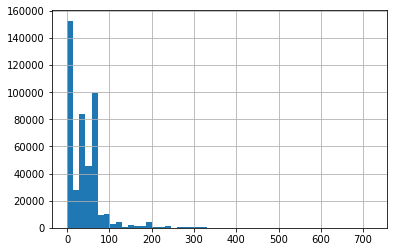

In [31]:
# Check the distribution of our numerical values
data['programme_duration_mins'].hist(bins=50)

#### min_watched

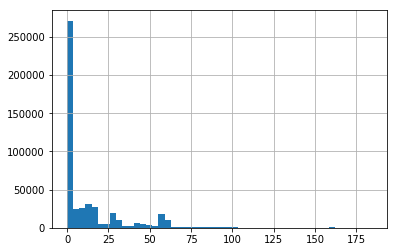

In [32]:
# Check the distribution for length watches (under 200 mins to be able to see more)
data[data['min_watched']<200]['min_watched'].hist(bins=50)

#### percentage_watched

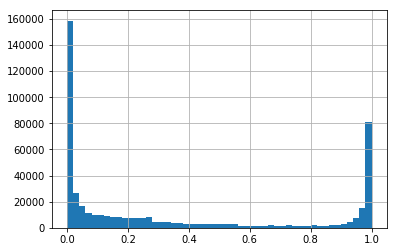

In [33]:
# Check the distribution of the completion rate
data['percentage_watched'].hist(bins=50)

RMK on the imputation: we added 1 to the distrib ...

#### two_week

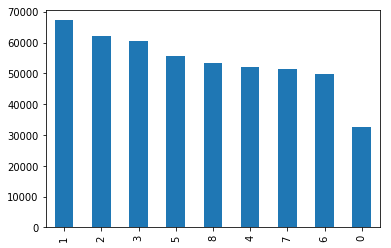

In [34]:
# Check whether we have more or less the same amount of data for each two week period
data['twoweek'].value_counts().plot(kind='bar')

#### genre and enriched_genre

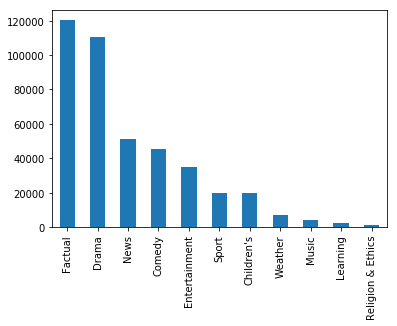

In [35]:
# Check distribution of categorical values
data['genre'].value_counts().plot(kind='bar')

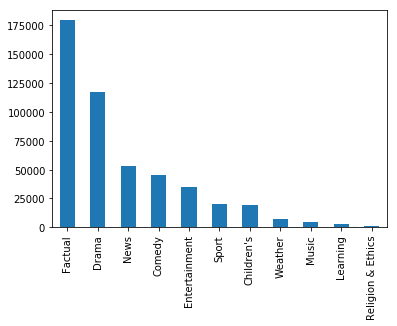

In [36]:
# How does this differ from the distribution of the enriched genre?
data['enriched_genre'].value_counts().plot(kind='bar')

So, most of the `genre` that we have enriched ended up being `factual`. We have therefore created a less balanced genre distribution. At this point we don't know whether this is a good thing or not, but it's worth keeping this in mind.

#### time_of_day

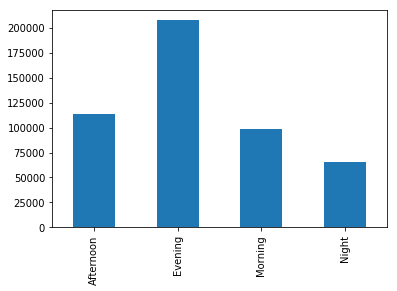

In [58]:
# When do people mostly watch (distribution over time of day)?
data['time_of_day'].value_counts().sort_index().plot(kind='bar')

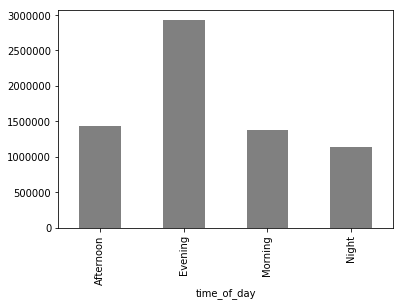

In [69]:
data.groupby(['time_of_day'])['min_watched'].sum().plot(kind='bar', color='grey')

#### weekday

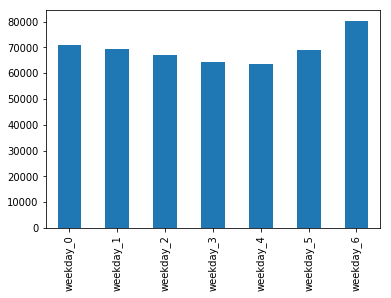

In [54]:
# Distribution over the weekday (weekday_0 is Monday)
data['weekday'].value_counts().sort_index().plot(kind='bar')

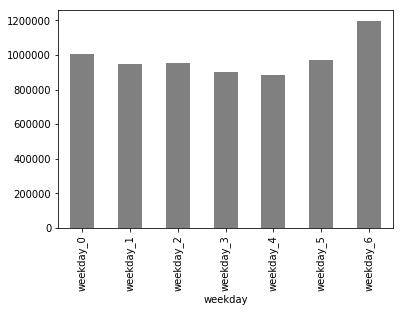

In [55]:
data.groupby(['weekday'])['min_watched'].sum().plot(kind='bar', color='grey')

#### weekday x time_of_day

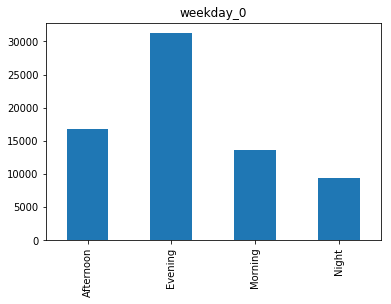

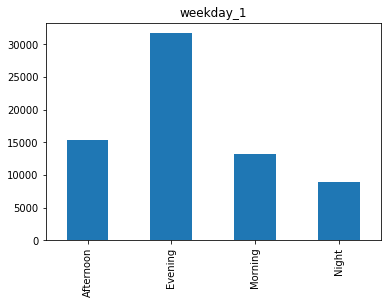

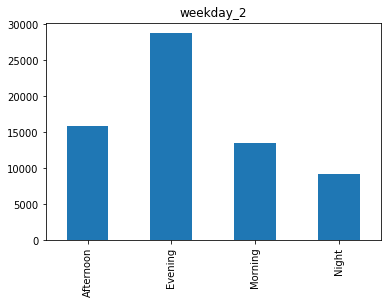

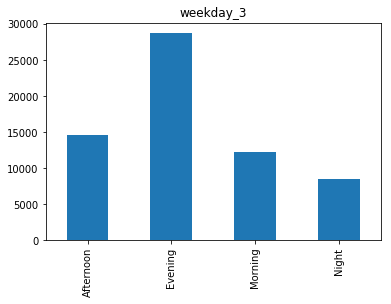

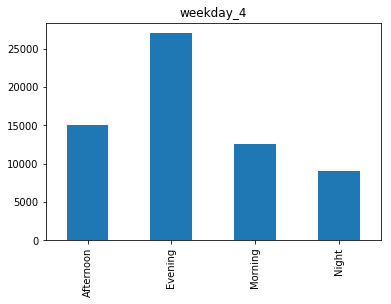

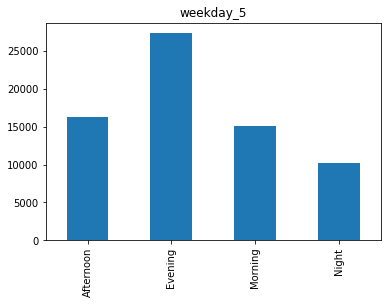

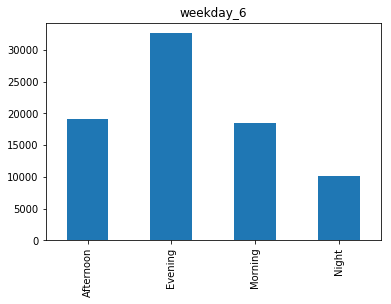

In [65]:
# Let's look at whether people watch at different times across different days
for day in sorted(set(data['weekday'])):
    data[data['weekday']==day]['time_of_day'].value_counts().sort_index().plot(kind='bar')
    plt.title(day)
    plt.show()

In [67]:
## Let's look at whether people watch at different times across different days
#for day in sorted(set(data['weekday'])):
#    data[data['weekday']==day].groupby(['time_of_day'])['min_watched'].sum().plot(kind='bar',
#                                                                                  color='grey')
#    plt.title(day)
#    plt.show()

Looks relatively similar. 

**TO DO:**
- Other analysis?  
- COMMENTS
- Give some insights from the distributions & examples of actions... Engagement related


__ Save new dataset - or create a class to call for the other notebook ? __

In [71]:
data.to_csv('iplayer_data_c1.csv', index=False)